In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# read in metacritic data
df_meta = pd.read_csv('metacritic.csv', header=0)

In [115]:
# preview data
df_meta.head()

# rename columns
df_meta = df_meta.rename(columns={"release_data": "Release_Date", "tittle": "Title", "plataforma": "Platform"})

# scale up userscore (x10) to match metascore scale
df_meta['userscore'] = df_meta['userscore']*10

df_meta.head()

,Unnamed: 0,Release_Date,Title,userscore,metascore,Platform,genre,developer,publisher,rating
0,0,1998-11-23,The Legend of Zelda: Ocarina of Time,91.0,99.0,Nintendo 64,"Action Adventure, ...",Nintendo,...,E
1,1,2000-09-20,Tony Hawk's Pro Skater 2,74.0,98.0,PlayStation,"Sports, ...",Neversoft Entertainment,...,T
2,2,2021-03-30,Disco Elysium: The Final Cut,82.0,97.0,PC,"Role-Playing, ...",ZA/UM,...,M
3,3,2000-10-30,Jet Grind Radio,83.0,94.0,Dreamcast,"Action, ...",Smilebit,...,T
4,4,2021-08-19,Quake Remastered,84.0,87.0,Switch,"Action, ...","id Software, MachineGames",...,M


In [116]:
# drop first column
df_meta = df_meta.iloc[:,1:]

# data types of columns
print(df_meta.dtypes)

# convert metascore from float to int
#df['metascore'] = df['metascore'].fillna(0).astype('int')

Release_Date     object
Title            object
userscore       float64
metascore       float64
Platform         object
genre            object
developer        object
publisher        object
rating           object
dtype: object


In [117]:
# create look-up table of platform and relase date

# using earliest PC game release for the PC release yera
# df_meta[df_meta['Platform'] == 'PC']['Release_Date'].min()

# source: https://en.wikipedia.org/wiki/History_of_video_game_consoles


df_plat_yr = pd.DataFrame({'Platform':df_meta['Platform'].unique(),
                           'Plat_Release_Yr':['1996', '1994', '1995',
                                              '1998', '2017', '2013',
                                              '2000', '2002', '2001',
                                              '2004', '2005', '2006',
                                              '2014', '2006', '2005',
                                              '2011', '2001', '2020', '2011',
                                              '2012', 'na', '2020', '2019']}).dropna()
# join console release y r to raw data and convert relase yr to int
df_meta = pd.merge(df_meta, df_plat_yr, how = "left", on = ['Platform'])
df_meta['Plat_Release_Yr'] = df_meta['Plat_Release_Yr'].dropna().astype('int')

In [128]:
# average scores by console
avg_scores_plat = df_meta.iloc[:,[2,3,4]].groupby(['Platform'])[['userscore','metascore']].mean().round(1).sort_values(by='userscore').reset_index()

# average scores by console
avg_scores_yr = df_meta.iloc[:,[2,3,9]].groupby(['Plat_Release_Yr'])[['userscore','metascore']].mean().round(1).sort_values(by='userscore').reset_index()


# convert to long form
avg_scores_long_plat = pd.concat([avg_scores_plat.iloc[:,[0,1]].rename(columns={"userscore": "score"}), 
                                  avg_scores_plat.iloc[:,[0,2]].rename(columns={"metascore": "score"})])

avg_scores_long_yr = pd.concat([avg_scores_yr.iloc[:,[0,1]].rename(columns={"userscore": "score"}), 
                                avg_scores_yr.iloc[:,[0,2]].rename(columns={"metascore": "score"})])


# add value for type of score (user or meta)
# list method refresher https://stackoverflow.com/questions/64541504/how-do-i-add-a-column-with-a-repeating-series-of-values-to-a-dataframe
ScoreType = ['userscore','metascore']
avg_scores_long_plat['Score_Type'] = [i for i in ScoreType for _ in range(len(avg_scores_plat))]
avg_scores_long_yr['Score_Type'] = [i for i in ScoreType for _ in range(len(avg_scores_yr))]

<Axes: title={'center': 'Yearly Avg VG Scores'}, xlabel='Plat_Release_Yr', ylabel='score'>

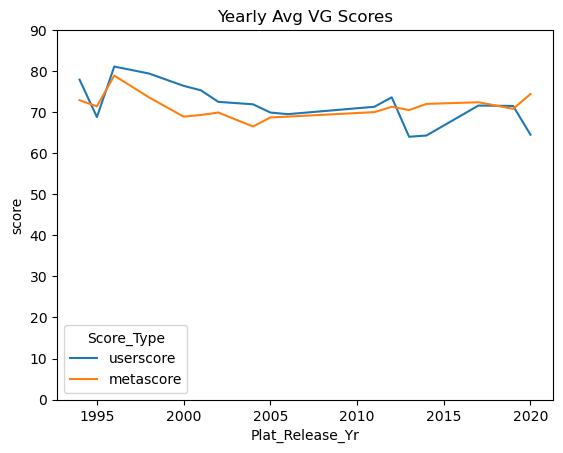

In [136]:
# game scores (user & meta) over time
avg_score_plt = sns.lineplot(data=avg_scores_long_yr, x="Plat_Release_Yr", y="score", 
                             hue="Score_Type")   

avg_score_plt.set_ylim(0, 90)
avg_score_plt.set(title='Yearly Avg VG Scores')
avg_score_plt

# add a plot for avg scores by plat for a view them 1x2

In [135]:
avg_scores_long_yr

,Plat_Release_Yr,score,Score_Type
0,2013.0,64.0,userscore
1,2014.0,64.3,userscore
2,2020.0,64.5,userscore
3,1995.0,68.8,userscore
4,2006.0,69.5,userscore
5,2005.0,69.9,userscore
6,2011.0,71.3,userscore
7,2019.0,71.5,userscore
8,2017.0,71.6,userscore
9,2004.0,71.9,userscore


In [121]:
df_meta.iloc[:,[2,3,9]].groupby(['Plat_Release_Yr'])[['userscore','metascore']].mean().round(1).sort_values(by='userscore')

,userscore,metascore
Plat_Release_Yr,,
2013.0,64.0,70.5
2014.0,64.3,72.0
2020.0,64.5,74.4
1995.0,68.8,71.4
2006.0,69.5,68.9
2005.0,69.9,68.7
2011.0,71.3,70.0
2019.0,71.5,70.8
2017.0,71.6,72.4
